# NAME SHOAIB FAROOQ

# Reg 21I-2278

# Libraries

In [1]:
#for operation on numpy array
import numpy as np
#for operation on datafram
import pandas as pd
#operation on string of curous
import string
#for calculation cosin 
from scipy.spatial.distance import cosine
#for draw different plot 
import matplotlib.pyplot as plt
#for access stop words
from nltk.corpus import stopwords

# Import Data File

In [2]:
with open('Data.txt') as f:
    contents = f.read()
    contents= contents.replace("'",' ').lower().split()
    contents.remove('etc.')
    print(contents)
print(len(contents))

['today', 'we', 'will', 'be', 'learning', 'about', 'the', 'fundamentals', 'of', 'data', 'science', 'and', 'statistics.', 'data', 'science', 'and', 'statistics', 'are', 'hot', 'and', 'growing', 'fields', 'with', 'alternative', 'names', 'of', 'machine', 'learning,', 'artificial', 'intelligence,', 'big', 'data,', 'i', 'm', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics', 'because', 'data', 'science', 'and', 'statistics', 'have', 'long', 'been', 'passions', 'of', 'mine.', 'i', 'didn', 't', 'use', 'to', 'be', 'very', 'good', 'at', 'data', 'science', 'and', 'statistics', 'but', 'after', 'studying', 'data', 'science', 'and', 'statistics', 'for', 'a', 'long', 'time,', 'i', 'got', 'better', 'and', 'better', 'at', 'it', 'until', 'i', 'became', 'a', 'data', 'science', 'and', 'statistics', 'expert.', 'i', 'm', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics,', 'thanks', 'for', 'listening', 'to', 'me', 't

# Rempve Stop Words

In [3]:
stop_words = set(stopwords.words("english"))
#filtring Taken Place
filtered_list = [word for word in contents if word.casefold() not in stop_words]
print(len(filtered_list))
print(filtered_list)

63
['today', 'learning', 'fundamentals', 'data', 'science', 'statistics.', 'data', 'science', 'statistics', 'hot', 'growing', 'fields', 'alternative', 'names', 'machine', 'learning,', 'artificial', 'intelligence,', 'big', 'data,', 'really', 'excited', 'talk', 'data', 'science', 'statistics', 'data', 'science', 'statistics', 'long', 'passions', 'mine.', 'use', 'good', 'data', 'science', 'statistics', 'studying', 'data', 'science', 'statistics', 'long', 'time,', 'got', 'better', 'better', 'became', 'data', 'science', 'statistics', 'expert.', 'really', 'excited', 'talk', 'data', 'science', 'statistics,', 'thanks', 'listening', 'talk', 'data', 'science', 'statistics']


# Data Prepration

In [4]:
#definr=e window size
Window_Size = 3
#for random semple selection
Negative_Sample_count=3
#contain combinations of negative and positive sample
Data=[]
#loop for find index and center word from text
for indx,Center_Word in enumerate(filtered_list[Window_Size-1 : -Window_Size]):
    #for store context wprd
    Context_Words=[]
    #find context word arround center word
    for Context_Word in filtered_list[indx : indx + 2 * Window_Size-1]:
        if Context_Word != Center_Word:
            #store contex word related to each center word
            Context_Words.append(Context_Word)
    #for assign positive examoles
    for Context_Word in Context_Words:
        Data.append([Center_Word,Context_Word,1])
        #for separate negative samples
        Negative_Samples = np.random.choice([a for a in filtered_list[Window_Size-1 : -Window_Size] 
                                             if a != Center_Word and a not in Context_Words],Negative_Sample_count)
        #insert in data
        for Negative_Sample in Negative_Samples:
            Data.append([Center_Word,Negative_Sample,0])
#it act as traning Data
Data

[['fundamentals', 'today', 1],
 ['fundamentals', 'expert.', 0],
 ['fundamentals', 'statistics', 0],
 ['fundamentals', 'talk', 0],
 ['fundamentals', 'learning', 1],
 ['fundamentals', 'intelligence,', 0],
 ['fundamentals', 'time,', 0],
 ['fundamentals', 'long', 0],
 ['fundamentals', 'data', 1],
 ['fundamentals', 'got', 0],
 ['fundamentals', 'big', 0],
 ['fundamentals', 'long', 0],
 ['fundamentals', 'science', 1],
 ['fundamentals', 'studying', 0],
 ['fundamentals', 'hot', 0],
 ['fundamentals', 'names', 0],
 ['data', 'learning', 1],
 ['data', 'excited', 0],
 ['data', 'statistics', 0],
 ['data', 'data,', 0],
 ['data', 'fundamentals', 1],
 ['data', 'statistics,', 0],
 ['data', 'use', 0],
 ['data', 'learning,', 0],
 ['data', 'science', 1],
 ['data', 'statistics', 0],
 ['data', 'use', 0],
 ['data', 'big', 0],
 ['data', 'statistics.', 1],
 ['data', 'use', 0],
 ['data', 'listening', 0],
 ['data', 'names', 0],
 ['science', 'fundamentals', 1],
 ['science', 'statistics', 0],
 ['science', 'talk', 0]

# Representation of Traning Data

In [5]:
#representation in the form of datafram
Data_Fram = pd.DataFrame(columns = ['CenterWords', 'ContextWords', 'Label'], data=Data)
Data_Fram

,CenterWords,ContextWords,Label
0,fundamentals,today,1
1,fundamentals,expert.,0
2,fundamentals,statistics,0
3,fundamentals,talk,0
4,fundamentals,learning,1
...,...,...,...
915,talk,statistics,0
916,talk,science,1
917,talk,big,0
918,talk,use,0


# Find Dublication from Tranining Data

In [6]:
#Find dublication words from datafram
dublicates_words = np.intersect1d(Data_Fram.CenterWords, Data_Fram.ContextWords)
dublicates_words

array(['alternative', 'artificial', 'became', 'better', 'big', 'data',
       'data,', 'excited', 'expert.', 'fields', 'fundamentals', 'good',
       'got', 'growing', 'hot', 'intelligence,', 'learning,', 'listening',
       'long', 'machine', 'mine.', 'names', 'passions', 'really',
       'science', 'statistics', 'statistics,', 'statistics.', 'studying',
       'talk', 'thanks', 'time,', 'use'], dtype=object)

In [7]:
Data_Fram.shape

(920, 3)

In [8]:
#Remove from datafram
Data_Fram = Data_Fram[Data_Fram.CenterWords.isin(dublicates_words)
                      & Data_Fram.ContextWords.isin(dublicates_words)].reset_index(drop=True)
Data_Fram.shape

(917, 3)

In [9]:
dublicates_words.shape

(33,)

# Word2Vector Processing

# Set Main Embedding and Context Embedding

In [10]:
#size of embedding
Embedding_Size = 5
# MAIN EMBEDDING
# normal add effect of normal distributation
# 0 is represented mean and 0.1 represented st
# random Generate Random Values
Main_Embeddings = np.random.normal(0, 0.1, (len(dublicates_words), Embedding_Size))

#take square of Main_Embeddings, sum values of each rows and reset the dimensions
# First Take square to remove negative effect
# Sum of all 5 columns
# find square root
# get 1x33 array
# Apply rshape to covort into 33x1 
row_sum  = np.sqrt((Main_Embeddings**2).sum(axis=1)).reshape(-1,1)

#normalize the manin embeding vectors
# divide each value of manin embedding normalize crosseponding value
Main_Embeddings = Main_Embeddings/row_sum



#CONTEXT EMBEDDING
# normal add effect of normal distributation
# 0 is represented mean and 0.1 represented st
# random Generate Random Values
Context_Embeddings = np.random.normal(0, 0.1, (len(dublicates_words), Embedding_Size))

#take square of Main_Embeddings, sum values of each rows and reset the dimensions
# First Take square to remove negative effect
# Sum of all 5 columns
# find square root
# get 1x33 array
# Apply rshape to covort into 33x1 
row_sum  = np.sqrt((Context_Embeddings**2).sum(axis=1)).reshape(-1,1)

#normalize the manin embeding vectors
# divide each value of manin embedding normalize crosseponding value
#normalize the Context_Embeddings vectors
Context_Embeddings = Context_Embeddings/row_sum


print(Main_Embeddings.shape)
print(Context_Embeddings.shape)

(33, 5)
(33, 5)


In [11]:
# Main_Embeddings convert into Datafrae
Main_Embeddings = pd.DataFrame(data=Main_Embeddings, index=dublicates_words)
Main_Embeddings.head()

,0,1,2,3,4
alternative,0.218581,0.204318,-0.554041,0.451810,-0.631968
artificial,-0.127127,0.381451,0.443989,-0.334112,-0.727720
became,0.025023,-0.469044,-0.664741,0.523697,0.251461
better,-0.231104,-0.454707,0.053695,-0.793355,0.327928
big,-0.409848,0.238434,0.632791,0.528837,-0.308352


In [12]:
# Context_Embeddings convert into Datafrae
Context_Embeddings = pd.DataFrame(data=Context_Embeddings, index=dublicates_words)
Context_Embeddings.head()

,0,1,2,3,4
alternative,-0.564297,-0.227380,0.023652,-0.725914,-0.319934
artificial,0.091621,-0.053565,0.986329,0.042144,-0.118809
became,-0.504979,-0.053509,-0.540890,0.398343,-0.539346
better,-0.109156,0.342839,-0.102191,0.658943,-0.652608
big,-0.111393,-0.577849,-0.069838,0.012376,0.805389


# Sigmoid Function

In [13]:
def sigmoid_finction(Dot_Product):
    return 1/(1+np.exp(-Dot_Product))

# Normalization Function

In [14]:
def Nomalization_of_Data(ComingData):
    Rows_Normlaization = np.sqrt((ComingData.values**2).sum(axis=1)).reshape(-1,1)
    return ComingData.divide(Rows_Normlaization, axis='index')

# Function For Update Embeddings

In [15]:
def For_Update_Embeddings(Data_Fram, Main_Embeddings, Context_Embeddings, Learning_Rate):
    
    #initlize the value of embeding with recpect to each center words (917x5) 
    Main_Embeddings_Center = Main_Embeddings.loc[Data_Fram.CenterWords].values
    
    #initlize the value of context embeding with recpect to each context words (917x5)
    Context_Embeddings_Data = Context_Embeddings.loc[Data_Fram.ContextWords].values
    
    #find difference between main and context data values (917x5)
    Differene = Context_Embeddings_Data - Main_Embeddings_Center
    
    #find dot peoduct of Main_Embeddings_Center and Context_Embeddings_Data
    # First apply multiply columwise
    # sum values columswise
    # Get Data Dimension (917,) ID Array
    Dot_Product = np.sum(Main_Embeddings_Center * Context_Embeddings_Data, axis = 1)
    
    #for find score value and adjust it  between 0 and 1 using segmoid function
    # (917,1) ID Array
    Score_Value = sigmoid_finction(Dot_Product)
    
    #find error or loss
    # Ground Truth = Data_Fram.Label
    # Predict = Score_Value
    # Resshape apply for set (917x1)
    loss = (Data_Fram.Label - Score_Value).values.reshape(-1,1)
    
    #for updates the values
    # multiply each value of loss with difference and hyper parameter
    #Get Updateed Data (917x5)
    Update_Data = Differene * loss * 0.1
    
    #store new values in new dataframe(917x5)
    Update_Data_Data_Fram = pd.DataFrame(data = Update_Data)
    
    #introduce centerword column in new updateed datafram (917x6)
    Update_Data_Data_Fram['CenterWords'] = Data_Fram.CenterWords
    
    #introduce contextword column in new updateed datafram (917x7)
    Update_Data_Data_Fram['ContextWords'] = Data_Fram.ContextWords
    
    #store in new datafram with respect to center 
    # First selected all crossepondig CenterWords values against each common word
    # Second sum with respect to each related common word (33x5) 
    Update_Data_Data_Fram_Center = Update_Data_Data_Fram.groupby('CenterWords').sum()
    
    #store in new datafram with respect to context 
    # First selected all crossepondig CenterWords values against each common word
    # Second sum with respect to each related common word (33x5) 
    Update_Data_Data_Fram_Context = Update_Data_Data_Fram.groupby('ContextWords').sum()
    
    #applying update process on embedings
    # First extract updated value with respect to Main Embeding word
    # Than sum it privous Emabiding value
    Main_Embeddings = Main_Embeddings + Update_Data_Data_Fram_Center.loc[Main_Embeddings.index]
    
    #applying update process on embedings
    # First extract updated value with respect to Main Embeding word
    # Than sum it privous Emabiding value
    Context_Embeddings = Context_Embeddings +  Update_Data_Data_Fram_Context.loc[Context_Embeddings.index]

    #for normalization of main embedings
    Main_Embeddings = Nomalization_of_Data(Main_Embeddings)

    #for normalization of context embedings
    Context_Embeddings = Nomalization_of_Data(Context_Embeddings)
    
    #return updated embedings
    return Main_Embeddings,Context_Embeddings


# Traning

In [16]:
for i in range(30):
    Main_Embeddings, Context_Embeddings = For_Update_Embeddings(Data_Fram, Main_Embeddings, Context_Embeddings, 0.1)

In [17]:
#Final embedings wrt Center Word
Main_Embeddings.head()

,0,1,2,3,4
alternative,0.398967,-0.511968,-0.742223,-0.117994,0.117886
artificial,-0.096612,-0.000850,0.500974,-0.653063,-0.559642
became,0.046437,-0.041665,-0.575871,0.548478,0.603035
better,-0.304746,0.213910,-0.640598,-0.181281,0.646640
big,-0.063030,-0.215731,-0.767766,0.422037,0.426505


In [18]:
#Final embedings wrt Context
Context_Embeddings.head()

,0,1,2,3,4
alternative,0.643867,-0.621091,-0.250929,-0.170597,0.328043
artificial,-0.148949,0.471574,-0.441356,-0.712387,0.230525
became,0.332846,-0.171348,0.227819,-0.548730,-0.711932
better,0.437558,0.727188,-0.090637,0.363921,-0.372944
big,0.879549,0.320829,-0.299218,-0.156335,0.097417


# Findusing cosine similarity

In [19]:
# Intilize empty Array for store combinations
Array = []
#for find angle withe respect to one to all other words.
# First loop run length uniquewords which is 33
for first_word in dublicates_words:
    # Second loop run length uniquewords which is 33
    for second_word in dublicates_words:
        # Check comarasians
        if first_word != second_word:
            
            sim = 1 - cosine(Main_Embeddings.loc[first_word], Main_Embeddings.loc[second_word])
            Array.append((first_word, second_word, sim*100))
# 33x33=1089
# but we got 1056 combinations 1056 combinations
len(Array)
Array[0:10]

[('alternative', 'artificial', -39.88607972548009),
 ('alternative', 'became', 47.36551605131887),
 ('alternative', 'better', 34.19877367191544),
 ('alternative', 'big', 65.56354057010111),
 ('alternative', 'data', -35.8983201953627),
 ('alternative', 'data,', 59.494334302832605),
 ('alternative', 'excited', -9.630798207427272),
 ('alternative', 'expert.', -79.1097654536797),
 ('alternative', 'fields', -0.7303888249150514),
 ('alternative', 'fundamentals', 0.011391434859597815)]

In [20]:
print(filtered_list)

['today', 'learning', 'fundamentals', 'data', 'science', 'statistics.', 'data', 'science', 'statistics', 'hot', 'growing', 'fields', 'alternative', 'names', 'machine', 'learning,', 'artificial', 'intelligence,', 'big', 'data,', 'really', 'excited', 'talk', 'data', 'science', 'statistics', 'data', 'science', 'statistics', 'long', 'passions', 'mine.', 'use', 'good', 'data', 'science', 'statistics', 'studying', 'data', 'science', 'statistics', 'long', 'time,', 'got', 'better', 'better', 'became', 'data', 'science', 'statistics', 'expert.', 'really', 'excited', 'talk', 'data', 'science', 'statistics,', 'thanks', 'listening', 'talk', 'data', 'science', 'statistics']


## Stronge Coorelated Words Relationship

In [21]:
for i in Array:
    #comare only value not words
    if i[2]>90:
        print(i)

('alternative', 'passions', 91.28808700279627)
('became', 'big', 93.68719294028737)
('better', 'data,', 93.67058360109334)
('better', 'listening', 94.16791052538557)
('big', 'became', 93.68719294028737)
('data', 'science', 98.24156558476326)
('data,', 'better', 93.67058360109334)
('data,', 'listening', 96.58516973279045)
('excited', 'learning,', 92.01422959004104)
('excited', 'use', 92.28927411294124)
('expert.', 'really', 91.15838239554375)
('expert.', 'statistics,', 96.46423102593012)
('learning,', 'excited', 92.01422959004104)
('learning,', 'use', 94.36286868410238)
('listening', 'better', 94.16791052538557)
('listening', 'data,', 96.58516973279045)
('long', 'time,', 91.87115986665233)
('mine.', 'thanks', 93.50910055108785)
('names', 'thanks', 90.67182962171262)
('passions', 'alternative', 91.28808700279627)
('passions', 'time,', 95.648895180765)
('really', 'expert.', 91.15838239554375)
('science', 'data', 98.24156558476326)
('statistics,', 'expert.', 96.46423102593012)
('statistics

## Very Week Coorelated Words Relationship

In [22]:
for i in Array:
    if i[2]<0:
        print(i)

('alternative', 'artificial', -39.88607972548009)
('alternative', 'data', -35.8983201953627)
('alternative', 'excited', -9.630798207427272)
('alternative', 'expert.', -79.1097654536797)
('alternative', 'fields', -0.7303888249150514)
('alternative', 'good', -33.91300062295919)
('alternative', 'got', -36.773629678171375)
('alternative', 'learning,', -1.601985110420534)
('alternative', 'machine', -40.82912788038673)
('alternative', 'mine.', -84.71267158542366)
('alternative', 'names', -76.0533302204975)
('alternative', 'really', -91.68400555031388)
('alternative', 'science', -39.17212555523839)
('alternative', 'statistics,', -83.81307509063585)
('alternative', 'studying', -11.535671386315883)
('alternative', 'thanks', -66.4811099513807)
('alternative', 'use', -0.6440933123823323)
('artificial', 'alternative', -39.88607972548009)
('artificial', 'became', -98.86222554763866)
('artificial', 'better', -53.51618477771063)
('artificial', 'big', -89.26652985909884)
('artificial', 'data', -21.435

# Intermediate Correlation

In [23]:
for i in Array:
    if i[2]>=0 or i[2]<90:
        print(i)

('alternative', 'artificial', -39.88607972548009)
('alternative', 'became', 47.36551605131887)
('alternative', 'better', 34.19877367191544)
('alternative', 'big', 65.56354057010111)
('alternative', 'data', -35.8983201953627)
('alternative', 'data,', 59.494334302832605)
('alternative', 'excited', -9.630798207427272)
('alternative', 'expert.', -79.1097654536797)
('alternative', 'fields', -0.7303888249150514)
('alternative', 'fundamentals', 0.011391434859597815)
('alternative', 'good', -33.91300062295919)
('alternative', 'got', -36.773629678171375)
('alternative', 'growing', 20.521275635105198)
('alternative', 'hot', 47.316631406755086)
('alternative', 'intelligence,', 16.586972360984443)
('alternative', 'learning,', -1.601985110420534)
('alternative', 'listening', 55.042870473043806)
('alternative', 'long', 85.43145923618336)
('alternative', 'machine', -40.82912788038673)
('alternative', 'mine.', -84.71267158542366)
('alternative', 'names', -76.0533302204975)
('alternative', 'passions', 

# Plotting

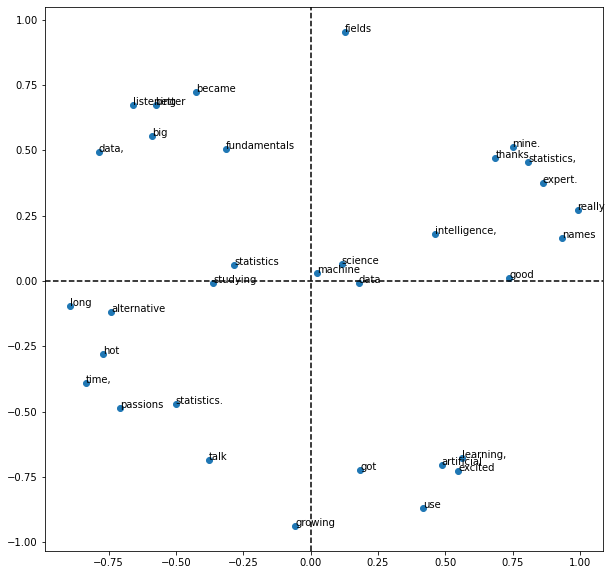

In [24]:
from sklearn.decomposition import PCA
Point = PCA(n_components=2)
Transf_Embeddings = Point.fit_transform(Main_Embeddings.values)
Target_Words = Main_Embeddings.index
Target_Words
plt.figure(figsize=(10,10))
plt.scatter(Transf_Embeddings[:,0], Transf_Embeddings[:,1])
for index,Row in enumerate(Transf_Embeddings):
    plt.text(Row[0], Row[1], str(Target_Words[index]))
plt.axvline(0, color='k', linestyle='--', alpha=1)
plt.axhline(0, color='k', linestyle='--', alpha=1)

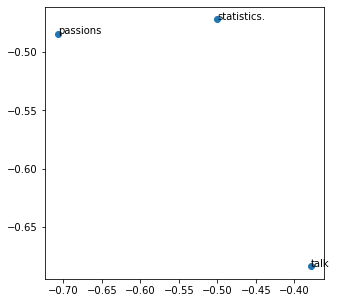

In [25]:
plt.figure(figsize=(5,5))

chosen_idxs = (Transf_Embeddings[:,0] < -.25) & (Transf_Embeddings[:,1] < -0.4)
transf_embeddings = Transf_Embeddings[chosen_idxs]
words_used = Target_Words[chosen_idxs]

plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))